In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Masters/10- December 2021/train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [ ]:
print(X_train.head())
print(Y_train.head())

   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]
0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = X_train / 255.0

In [ ]:


def plot_digits(X, Y):
    for i in range(35):
        plt.subplot(5, 7, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()



In [ ]:
12*28*66

22176

In [ ]:
(12*28*66) + (20 * 66)

23496

In [ ]:
(0.0003125) * (23496)

7.3425

In [ ]:
7179 + 7.3425 + 33.42

7219.7625

In [ ]:
(0.0003125) * ( 22176 + 5280)

8.58

In [ ]:
691 + 7179 + 8.58

7878.58

In [ ]:
33179.6667 / 7219.7625

4.595672877051012

In [ ]:
(10**-8)/ 32

3.125e-10

In [ ]:
(10**6)*3.125e-10

0.0003125

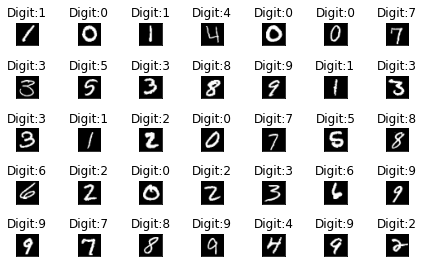

In [ ]:
plot_digits(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


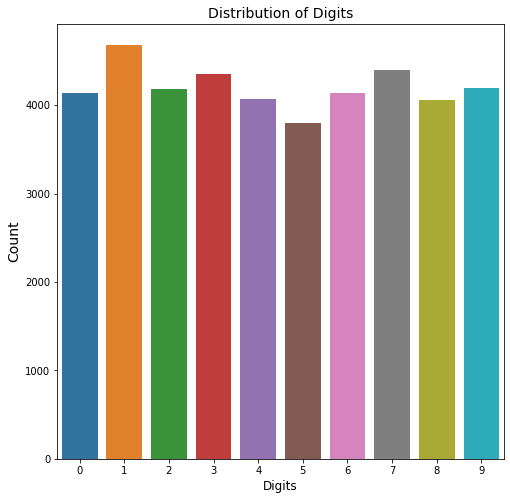

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [ ]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [ ]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
224.8 ns
33.1796667 ms

In [ ]:
d=0

In [ ]:
(33.1796667 * (10** -3))/ ( 224.8 * (10** -9))

147596.3821174377

In [ ]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint_path = 'Lenet5Mnist.h5'
import tensorflow as tf
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose =1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [ ]:
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [ ]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=30, validation_data=(X_val, T_val), callbacks=[reduce_lr , cp_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
408/407 [==============================] - ETA: 0s - loss: 0.4878 - accuracy: 0.8442WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr

Epoch 00001: saving model to Lenet5Mnist.h5
407/407 [==============================] - 45s 109ms/step - loss: 0.4878 - accuracy: 0.8442 - val_loss: 0.0986 - val_accuracy: 0.9667 - lr: 5.0000e-04
Epoch 2/30
408/407 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9564WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr

Epoch 00002: saving model to Lenet5Mnist.h5
407/407 [==============================] - 45s 110ms/step - loss: 0.1433 - accuracy: 0.9564 - val_loss: 0.0739 - val_accuracy: 0.9746 - lr: 5.0000e-04
Epoch 3/30
408/407 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0

In [ ]:
score = model.evaluate(X_val, T_val, batch_size=32)

40/40 [==============================] - 0s 11ms/step - loss: 0.0201 - accuracy: 0.9960


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Masters/10- December 2021/test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0


X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 0, 3])

In [ ]:


def plot_digits(X, Y):
    for i in range(5):
        plt.subplot(5, 1, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()



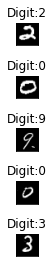

In [ ]:
plot_digits(X_test, Y_test)

In [ ]:
import h5py
dataset = h5py.File('/content/drive/MyDrive/Masters/10- December 2021/Lenet5Mnist.h5', 'r')
big = list(dataset.items())
print(big)
print(len(big))

[('conv2d', <HDF5 group "/conv2d" (1 members)>), ('conv2d_1', <HDF5 group "/conv2d_1" (1 members)>), ('dense', <HDF5 group "/dense" (1 members)>), ('dense_1', <HDF5 group "/dense_1" (1 members)>), ('dense_2', <HDF5 group "/dense_2" (1 members)>), ('flatten', <HDF5 group "/flatten" (0 members)>), ('max_pooling2d', <HDF5 group "/max_pooling2d" (0 members)>), ('max_pooling2d_1', <HDF5 group "/max_pooling2d_1" (0 members)>), ('top_level_model_weights', <HDF5 group "/top_level_model_weights" (0 members)>)]
9


In [ ]:
f = open("weights.txt", "w")
for i in range (9):
  f.write("layer number:")
  f.write(str(i) + "\n")
  #print(big[i])
  f.write(big[i][0] + "\n")
  G1_list = list(dataset.get(big[i][0]))
  #print(G1_list)
  G1 = dataset.get(big[i][0])
  #print(G1)
  G2= G1.get(big[i][0])
  if G2 is not None: 
    G3 =list(G2.items())
    #print(G3)

    f.write(G3[0][0] + "\n")
    f.write(str(len(np.array(G2.get(G3[0][0]))))+ "\n")
    with np.printoptions(threshold= np.inf):
      f.write(str(np.array(G2.get(G3[0][0])))+ "\n")
    #print((np.array(G2.get(G3[0][0]))).shape)
    #print((np.array(G2.get(G3[0][0])))[0].size)
    #for row in x:
    #  np.savetxt(f, row)
    f.write("--------------------------------------------------" + "\n") 
    f.write(G3[1][0]  + "\n")
    arr1= G2.get(G3[1][0])
    f.write(str(len(np.array(arr1)))+ "\n")
    if arr1.ndim is 4:
      arr2 = np.moveaxis(np.array(arr1),[0,1, 2, 3], [2,3,1,0])
    else:
      arr2 = np.array(arr1)
    #arr3 = np.rollaxis(arr2, axis= -1)
    with np.printoptions(threshold= np.inf):
      f.write(str(arr2)+ "\n")
    print((np.array(arr1)).shape)
    print(arr2.shape)
    #print((np.array(G2.get(G3[1][0])))[0].size)
    f.write("--------------------------------------------------" + "\n") 
  f.write("***************" + "\n")
  f.write("***************" + "\n")
  f.write("***************" + "\n")
f.close()

(5, 5, 1, 32)
(32, 1, 5, 5)
(5, 5, 32, 48)
(48, 32, 5, 5)
(1200, 256)
(1200, 256)
(256, 84)
(256, 84)
(84, 10)
(84, 10)


In [ ]:

weight = model.get_weights()
np.savetxt('weight.csv' , weight , fmt='%s', delimiter=',')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
2** 8 + 2**6 + 2**4 + 2**2

340

In [ ]:
4.9590520560741425e-2 * 4.1162246286869049e1 //3

2.041257220815282

In [ ]:
3.4323228180408478e1 * 2.6070713996887207e-1

8.948310653413287

In [ ]:
2.9110091742873192e2 * 5.3540605306625366e-1


155.85719324448277

In [ ]:
2.0499611896276474e2 *  4.4125995039939880e-1

90.45657728557883

In [ ]:
3.0800072854757309e2 *  2.6693445444107056e-1

82.21600644229869

In [ ]:
2.041257220815282 +  8.948310653413287  + 155.85719324448277  + 90.45657728557883  +  82.21600644229869

339.51934484658887

In [ ]:
4.2173535128888756e2 - 3.3951934484658887e2

82.21600644229869

In [ ]:
 2**6 + 2**5 + 2**4 + 2**3

120

In [ ]:
8.2216006442298692e1

82.21600644229869

In [ ]:
"010100000010001001000110100000011001110111110010000111010111010010" == "010100000010010011100001100111110001010011011001010011011101101100"

False

In [ ]:
"010100000010000000100100011111000111101100101010101100101100010111"  == "010100000001111110110010010110110010011111110010011101010001011010"

False

In [ ]:
"010100000001110101001110000100111100111100100010101011011100100000" == "010100000001110101001110000100111100111100100010101011011100100000"

True

In [ ]:
"010100000001111010010110111100001111111111101101101000110101111111" == "010100000001110101001110000100111100111100100010101011011100100000"

False

In [ ]:
"010100000001110101001110000100111100111100100010101011011100100000" == "010100000001110101001110000100111100111100100010101011011100100000"

True

In [ ]:
"010100000000000000010101000111111010101010011100010000000011111111" == "010100000000000000010101000111111010101010011100010000000011111111"

True

In [ ]:
3.3951934484658887e2 + 6.1061649922466707e1 

400.58099476905556

In [ ]:
3.3951934484658887e2 + 6.1061649922466707e1 +  2.1101862784596506

402.6911810475152

In [ ]:
3.3951934484658887e2 + 6.1061649922466707e1 +  2.1101862784596506  + 1.2757169499217845e2

530.2628760396937

In [ ]:
3.3951934484658887e2 + 6.1061649922466707e1 +  2.1101862784596506  + 1.2757169499217845e2 + -1.9748851656913757e-2

530.2431271880367

In [ ]:
-0.019748851656913757 == -1.9748851656913757e-2

True

In [ ]:
530.2431271880367 - 4.9258901957358978e2


37.65410761444696

In [ ]:
5.3024312718803674e2 - 530.2431271880367

0.0

In [ ]:
4.9258901957358984e2

In [ ]:
4.9258901957358978e2

In [ ]:
0.4441196918487549 * 4.1162246286869049e1 

18.280964136726837

In [ ]:
3.4323228180408478e1 * 0.26070713996887207

8.948310653413287

In [ ]:
2.9110091742873192e2 * 0.4412599503993988

128.45117638582173

In [ ]:
2.0499611896276474e2 * 0.5354060530662537 

109.75616294775406

In [ ]:
3.0800072854757309e2  * 0.26693445444107056 

82.21600644229869

In [ ]:
18.280964136726837 + 8.948310653413287  + 128.45117638582173 + 109.75616294775406 + 82.21600644229869 //new rom in 1

347.6526205660146

In [ ]:
4.9258901957358978e2 - -0.019748851656913757

492.6087684252467

In [ ]:
530.2431271880367  - -0.019748851656913757

530.2628760396937

In [ ]:
530.2431271880367

In [ ]:
 530.2431271880367

In [ ]:
492.5890195735898

In [ ]:
import tensorflow as tf

In [ ]:
featuremap = np.array([])

In [ ]:
weight = np.array([])

In [ ]:
x = tf.nn.convolution(featuremap , weight , padding='VALID')

In [ ]:
print(x)

In [ ]:
(0.18859189748764038 * 6.8869649878889322e2) + (0.14352713525295258 * 7.1146031869202852e2 ) + (0.4441196918487549 * 6.6042526276409626e2) + (0.08750399202108383 * 5.4450817962735891e2) + ( 0.26070713996887207 * 6.9629221733659506e2) + (0.4412599503993988 * 6.9114943577349186e2) 

1059.4558627935535

In [ ]:
(3.4591310916468501e1 * 0.14352713525295258 ) + (1.1550440797605552e2 * 0.4441196918487549  ) + (1.0893103069090284e2 * 0.4412599503993988) + (1.1905673299916089e2 * 0.049590520560741425) + ( 5.3285165219800547e1 * 0.26693445444107056) 

124.45720691104609

In [ ]:
for i in range(1,27):
  print(i, i * 13)

1 13
2 26
3 39
4 52
5 65
6 78
7 91
8 104
9 117
10 130
11 143
12 156
13 169
14 182
15 195
16 208
17 221
18 234
19 247
20 260
21 273
22 286
23 299
24 312
25 325
26 338


In [ ]:
1.2496214118781163e3 - 1249.6214118781163

0.0

In [ ]:
2.2610905971368184e3 - 2261.090597136819

-4.547473508864641e-13

In [ ]:
2.5851713067840469e3 - 2585.1713067840465

4.547473508864641e-13

In [ ]:
3.1902952209505861e3 - 3190.295220950587

-9.094947017729282e-13

In [ ]:
2.1901624244507084e3 - 

In [ ]:
9.8599675556870250e2

In [ ]:
9.3043509745485198e2

In [ ]:
2**10

1024

In [ ]:
2**10 + 2**8 + 2**5+ 2**3

1320

In [ ]:
for i in range(0, 102):
  print(i, i * 13)

0 0
1 13
2 26
3 39
4 52
5 65
6 78
7 91
8 104
9 117
10 130
11 143
12 156
13 169
14 182
15 195
16 208
17 221
18 234
19 247
20 260
21 273
22 286
23 299
24 312
25 325
26 338
27 351
28 364
29 377
30 390
31 403
32 416
33 429
34 442
35 455
36 468
37 481
38 494
39 507
40 520
41 533
42 546
43 559
44 572
45 585
46 598
47 611
48 624
49 637
50 650
51 663
52 676
53 689
54 702
55 715
56 728
57 741
58 754
59 767
60 780
61 793
62 806
63 819
64 832
65 845
66 858
67 871
68 884
69 897
70 910
71 923
72 936
73 949
74 962
75 975
76 988
77 1001
78 1014
79 1027
80 1040
81 1053
82 1066
83 1079
84 1092
85 1105
86 1118
87 1131
88 1144
89 1157
90 1170
91 1183
92 1196
93 1209
94 1222
95 1235
96 1248
97 1261
98 1274
99 1287
100 1300
101 1313


In [ ]:
2**8 + 2**6 + 2**4+ 2**3+ 2**0

345

In [ ]:
3.1828230226623432e3 - 3.1828230226623455e3

-2.2737367544323206e-12

In [ ]:
1315-1024 -256-32 - 2 -1

0

In [ ]:
2**10 +2**8 +2**5 +2**1 +2**0 

1315